In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import re
import string

In [2]:
df = pd.read_csv("fake reviews dataset.csv")

In [3]:
df.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [4]:
df.shape

(40432, 4)

In [5]:
df['label'].value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [6]:
total_words=df['text_'].str.split().str.len().min()
print(total_words)

1


In [7]:
df['result']=1
i=0
for d in df.label:
    if d == 'CG':
        df.result[i]=0
    i=i+1

df.head(10)


/var/folders/rr/00y7pjfs7w35w13t725x87yc0000gn/T/ipykernel_8173/81660144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.result[i]=0


,category,rating,label,text_,result
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",0
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",0
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,0
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",0
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,0
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,0
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...,0
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...,0
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi...",0
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...,0


In [8]:
df.sample(frac=1)

,category,rating,label,text_,result
39922,Clothing_Shoes_and_Jewelry_5,3.0,OR,These were bought as Xmsa gifts bc of teh nove...,1
27061,Kindle_Store_5,5.0,CG,"Sebastian and Chloe's story was a sweet, sweet...",0
12824,Movies_and_TV_5,3.0,OR,It was an enjoyable movie but just not as good...,1
6937,Sports_and_Outdoors_5,5.0,CG,"When I got this chain, it was a little tight b...",0
21071,Pet_Supplies_5,3.0,OR,My cat will play for about 30 seconds and leav...,1
...,...,...,...,...,...
38378,Clothing_Shoes_and_Jewelry_5,4.0,OR,These fit smaller than I was expecting. They a...,1
8260,Electronics_5,5.0,CG,"This battery works very well, and has the qual...",0
19570,Pet_Supplies_5,5.0,CG,Great Product & great company.My dog loves the...,0
30847,Books_5,5.0,CG,l love the time period. I love the way they a...,0


In [9]:
df.drop(['category','rating','label'], axis=1, inplace = True)

In [10]:
df.head(10)

,text_,result
0,"Love this! Well made, sturdy, and very comfor...",0
1,"love it, a great upgrade from the original. I...",0
2,This pillow saved my back. I love the look and...,0
3,"Missing information on how to use it, but it i...",0
4,Very nice set. Good quality. We have had the s...,0
5,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,0
6,They are the perfect touch for me and the only...,0
7,These done fit well and look great. I love th...,0
8,"Great big numbers & easy to read, the only thi...",0
9,My son loves this comforter and it is very wel...,0


In [11]:
df.shape

(40432, 2)

In [12]:
df.columns


Index(['text_', 'result'], dtype='object')

In [13]:
def worddrop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [14]:
df['text_']=df['text_'].apply(worddrop)

In [15]:
df.head(10)

,text_,result
0,love this well made sturdy and very comfor...,0
1,love it a great upgrade from the original i...,0
2,this pillow saved my back i love the look and...,0
3,missing information on how to use it but it i...,0
4,very nice set good quality we have had the s...,0
5,i wanted different flavors but they are not,0
6,they are the perfect touch for me and the only...,0
7,these done fit well and look great i love th...,0
8,great big numbers easy to read the only thi...,0
9,my son loves this comforter and it is very wel...,0


In [16]:
total_words=df['text_'].str.split().str.len().sum()
print(total_words)

2776544


In [17]:
df = df.sample(frac=1)
df.head()

,text_,result
29026,this book came into my life at exactly the rig...,1
37851,loved this bra so much i ordered two more it ...,1
21056,used product for several weeks and saw no diff...,1
38379,better quality than i expected i m going to o...,1
25549,i didn t love this i was looking for somethi...,1


In [18]:
x = df['text_']
y = df['result'] 

### Splitting dataset into training and testing parts

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

### text -> vectors

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LR = LogisticRegression()

In [24]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
pred_lr = LR.predict(xv_test)

In [26]:
LR.score(xv_test,y_test)

0.9055203798971112

In [67]:
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pylab as plt
import scipy.sparse as sparse

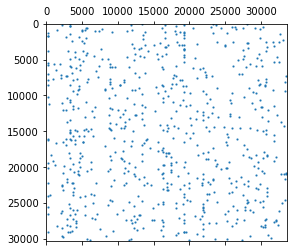

In [78]:
plt.spy(xv_train, precision = 0.7, markersize = 1)

In [81]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5059
           1       0.90      0.92      0.91      5049

    accuracy                           0.91     10108
   macro avg       0.91      0.91      0.91     10108
weighted avg       0.91      0.91      0.91     10108



In [82]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(xv_train, y_train)

In [83]:
model.classes_

array([0, 1])

In [84]:
model.intercept_

array([1.29903944])

In [85]:
model.coef_

array([[-0.54606179,  0.07937085,  0.00582591, ...,  0.1307183 ,
         0.01557212,  0.08298451]])

In [87]:
model.predict_proba(xv_train)

array([[0.59430035, 0.40569965],
       [0.09955371, 0.90044629],
       [0.0806332 , 0.9193668 ],
       ...,
       [0.1951648 , 0.8048352 ],
       [0.25019338, 0.74980662],
       [0.16997638, 0.83002362]])

In [90]:
model.predict(xv_test)

array([1, 1, 1, ..., 1, 1, 0])

In [91]:
model.score(xv_test, y_test)

0.9055203798971112

In [94]:
confusion_matrix(y_test, model.predict(xv_test))

array([[4522,  537],
       [ 418, 4631]])

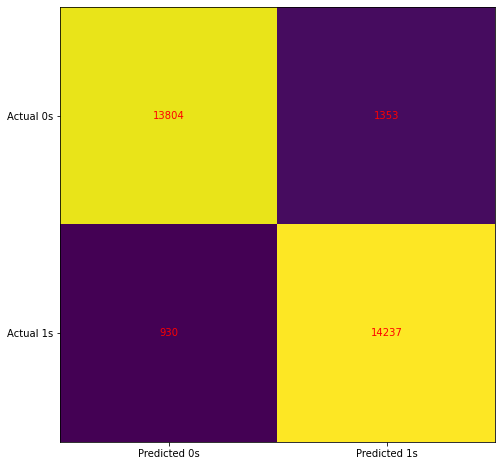

In [135]:
cm = confusion_matrix(y_train, model.predict(xv_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Decision Tree Classification

In [96]:
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [97]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [98]:
pred_dt = DT.predict(xv_test)

In [99]:
DT.score(xv_test, y_test)

0.7735457063711911

In [100]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      5059
           1       0.78      0.76      0.77      5049

    accuracy                           0.77     10108
   macro avg       0.77      0.77      0.77     10108
weighted avg       0.77      0.77      0.77     10108



In [101]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_15440 <= 0.08
|   |--- feature_1662 <= 0.02
|   |   |--- feature_29852 <= 0.14
|   |   |   |--- feature_32897 <= 0.12
|   |   |   |   |--- feature_13397 <= 0.11
|   |   |   |   |   |--- feature_15481 <= 0.18
|   |   |   |   |   |   |--- feature_14646 <= 0.02
|   |   |   |   |   |   |   |--- feature_29852 <= 0.05
|   |   |   |   |   |   |   |   |--- feature_6479 <= 0.13
|   |   |   |   |   |   |   |   |   |--- feature_994 <= 0.14
|   |   |   |   |   |   |   |   |   |   |--- feature_19857 <= 0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 179
|   |   |   |   |   |   |   |   |   |   |--- feature_19857 >  0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |--- feature_994 >  0.14
|   |   |   |   |   |   |   |   |   |   |--- feature_2364 <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- feature_2364 

In [103]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

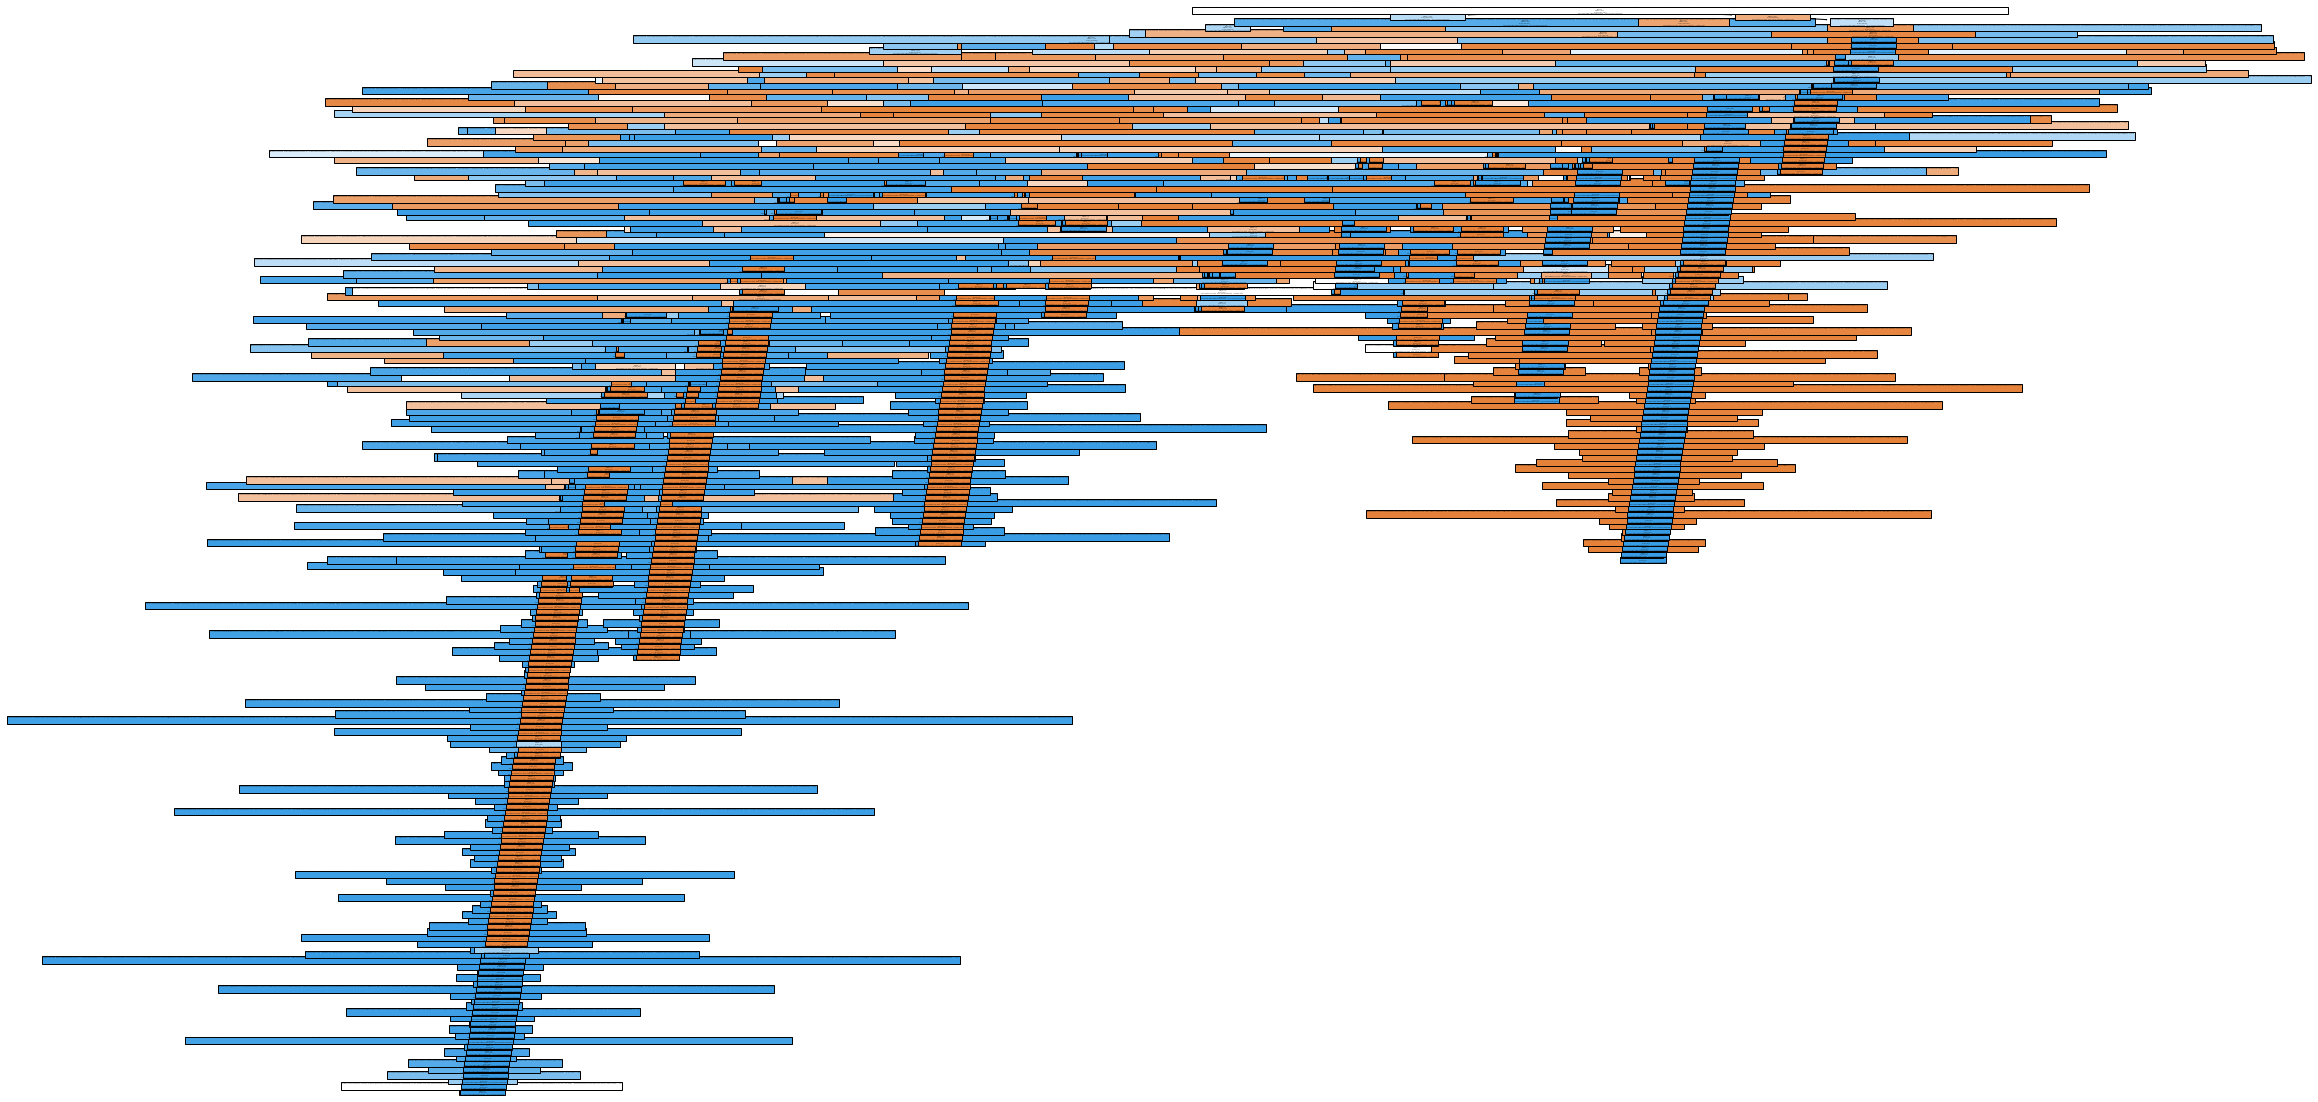

In [113]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=df['text_'],  
                   class_names=df['text_'],
                   filled=True)


In [114]:
fig.savefig("decistion_tree.png")

### Gradient boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [73]:
pred_gbc = GBC.predict(xv_test)

In [74]:
GBC.score(xv_test, y_test)

0.8451721408785121

In [75]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4967
           1       0.84      0.87      0.85      5141

    accuracy                           0.85     10108
   macro avg       0.85      0.84      0.84     10108
weighted avg       0.85      0.85      0.85     10108



### Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
RFC = RandomForestClassifier(random_state=0)

In [117]:
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [118]:
pred_rfc = RFC.predict(xv_test)

In [119]:
RFC.score(xv_test, y_test)

0.8881084289671547

In [123]:
estimator = RFC.estimators_[5]

In [120]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5059
           1       0.91      0.86      0.88      5049

    accuracy                           0.89     10108
   macro avg       0.89      0.89      0.89     10108
weighted avg       0.89      0.89      0.89     10108



In [121]:
from sklearn.tree import export_graphviz

In [134]:
export_graphviz(estimator, out_file= 'tree.dot', 
                feature_names = df['text_'],
                class_names = df['text_'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

ValueError: Length of feature_names, 40432 does not match number of features, 33636

### Naive Bayes 

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
NB = MultinomialNB()

In [97]:
NB.fit(xv_train,y_train)

MultinomialNB()

In [98]:
pred_NB = NB.predict(xv_test)

In [99]:
NB.score(xv_test, y_test)

0.8617926394934705

In [100]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4967
           1       0.92      0.80      0.85      5141

    accuracy                           0.86     10108
   macro avg       0.87      0.86      0.86     10108
weighted avg       0.87      0.86      0.86     10108



### Manual Testing

In [82]:
def output_lable(n):
    if n == 0:
        return "Computer Generated Comment"
    elif n == 1:
        return "Human Comment"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(worddrop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [89]:
review = str(input())
manual_testing(review)

"This is my review of :TOGUARD Mini Dash Cam, Car Driving Recorder, Full HD 1080P 1.5" LCD Dashboard Camera with SONY Exmor Sensor, G-Sensor, Motion detection, Loop recording, Super Capacitor The 'TOGUARD Mini Dash Cam, Car Driving Recorder, Full HD 1080P 1.5" LCD Dashboard Camera with SONY Exmor Sensor, G-Sensor, Motion detection, Loop recording, Super Capacitor' is a well built, brilliant quality, best value dash cam you can buy. This dash cam comes well packaged and includes nearly everything you need to get going except a Micro-SD card and it will accept up to 32GB. In the box, you will also find the camera, vehicle charger adaptor, vehicle suction cup holder, USB cable and a manual. What I love about it is that it is virtually plug and play. Literally just pop a micro-SD card in the slot (I formatted it first) and set it up in your car. All the settings are pre-configured and as soon as you start the car it starts recording and stops when you turn it off. The contents include: ? 1